In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('c:/tcl/jupyter/sklearn/mlcourse/data1.csv')

In [3]:
df.describe(include=['object','bool'])

state phone number international plan voice mail plan  churn
count   3333         3333               3333            3333   3333
unique    51         3333                  2               2      2
top       WV     408-3384                 no              no  False
freq     106            1               3010            2411   2850

In [4]:
df['churn'] = df['churn'].astype('int64')

In [5]:
pd.crosstab(df['churn'],df['international plan'])

international plan    no  yes
churn                        
0                   2664  186
1                    346  137

In [6]:
pd.crosstab(df['churn'],df['international plan'],normalize=True,margins=True)

international plan       no       yes       All
churn                                          
0                   0.79928  0.055806  0.855086
1                   0.10381  0.041104  0.144914
All                 0.90309  0.096910  1.000000

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

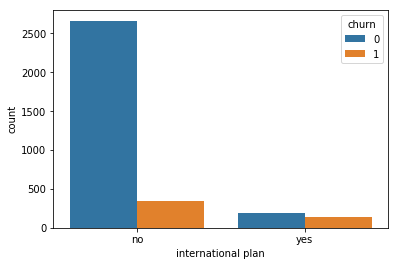

In [8]:
sns.countplot(x='international plan',hue='churn',data=df)

In [9]:
df[['international plan','churn']].head()

international plan  churn
0                 no      0
1                 no      0
2                 no      0
3                yes      0
4                yes      0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F77FFA4E48>,
      dtype=object)

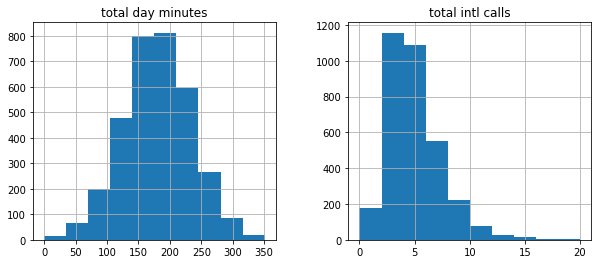

In [10]:
features=['total day minutes','total intl calls']
df[features].hist(figsize=(10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F70122D0B8>,
      dtype=object)

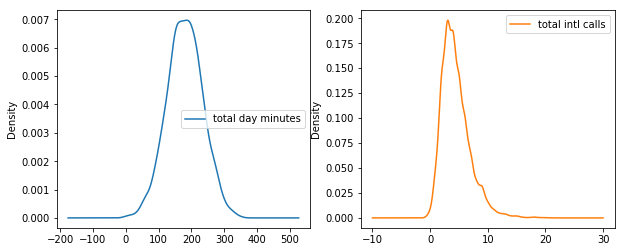

In [11]:
df[features].plot(kind='density',subplots=True,layout=(1,2),sharex=False,figsize=(10,4))

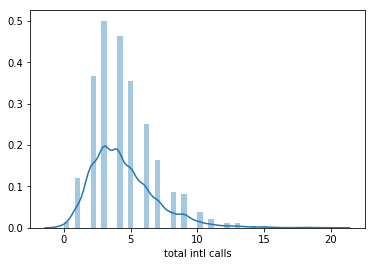

In [12]:
sns.distplot(df['total intl calls'])

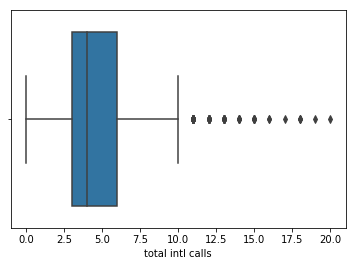

In [13]:
sns.boxplot(x='total intl calls',data=df)

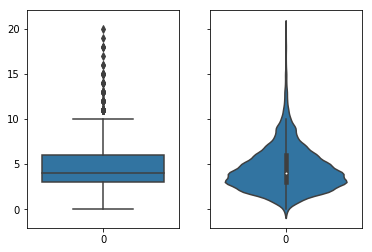

In [14]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(6,4))
sns.boxplot(data=df['total intl calls'],ax=axes[0])
sns.violinplot(data=df['total intl calls'],ax=axes[1])

In [15]:
d={0:'False',1:'True'}
df['churn']=df['churn'].map(d)
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

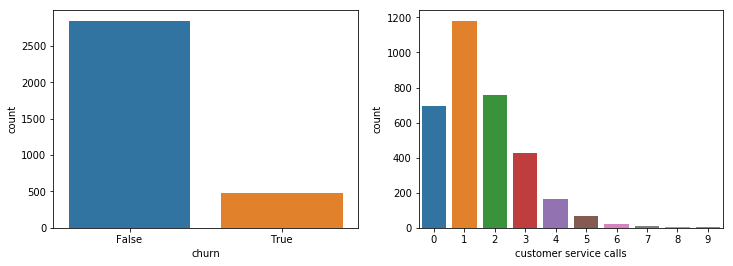

In [16]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))
sns.countplot(x='churn',data=df,ax=axes[0])
sns.countplot(x='customer service calls',data=df,ax=axes[1])

In [17]:
numerical = list(set(df.columns) - set(['state','international plan','voive mail plan','area code','churn','customer \
service calls']))

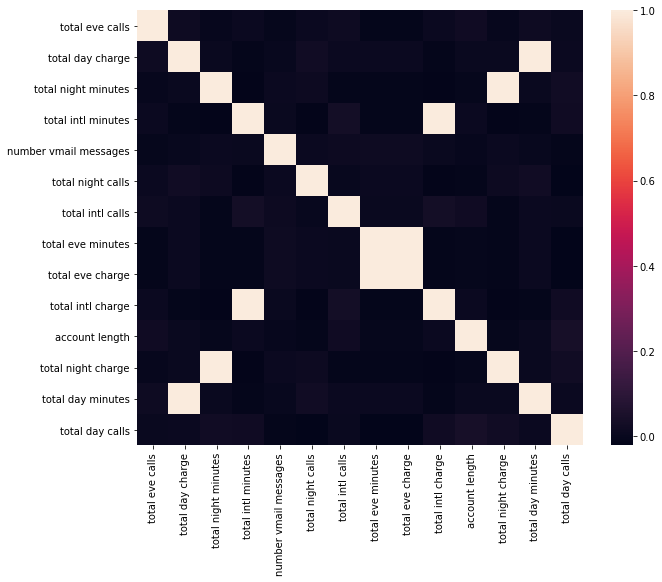

In [18]:
plt.subplots(figsize=(10,8))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [19]:
numerical = list(set(numerical) - set(['total day charge','total eve charge','total night charge','total intl charge']))

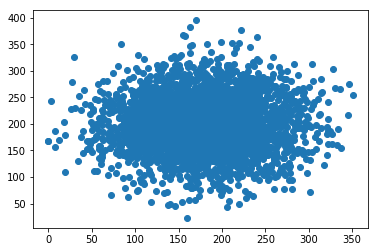

In [20]:
plt.scatter(df['total day minutes'],df['total night minutes'])

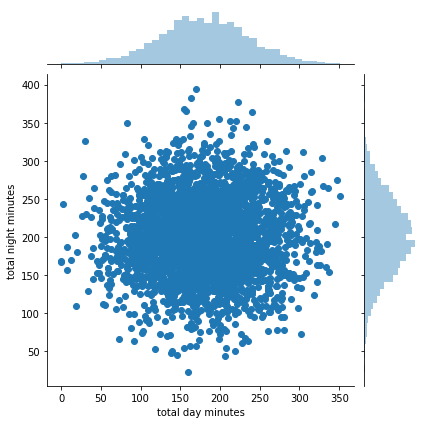

In [21]:
sns.jointplot(x='total day minutes',y='total night minutes',data=df,kind='scatter')

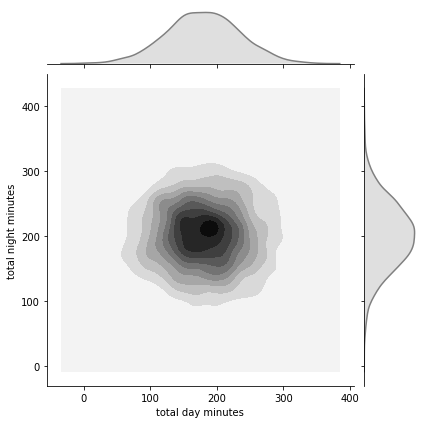

In [22]:
sns.jointplot(x='total day minutes',y='total night minutes',data=df,kind='kde',color='grey')

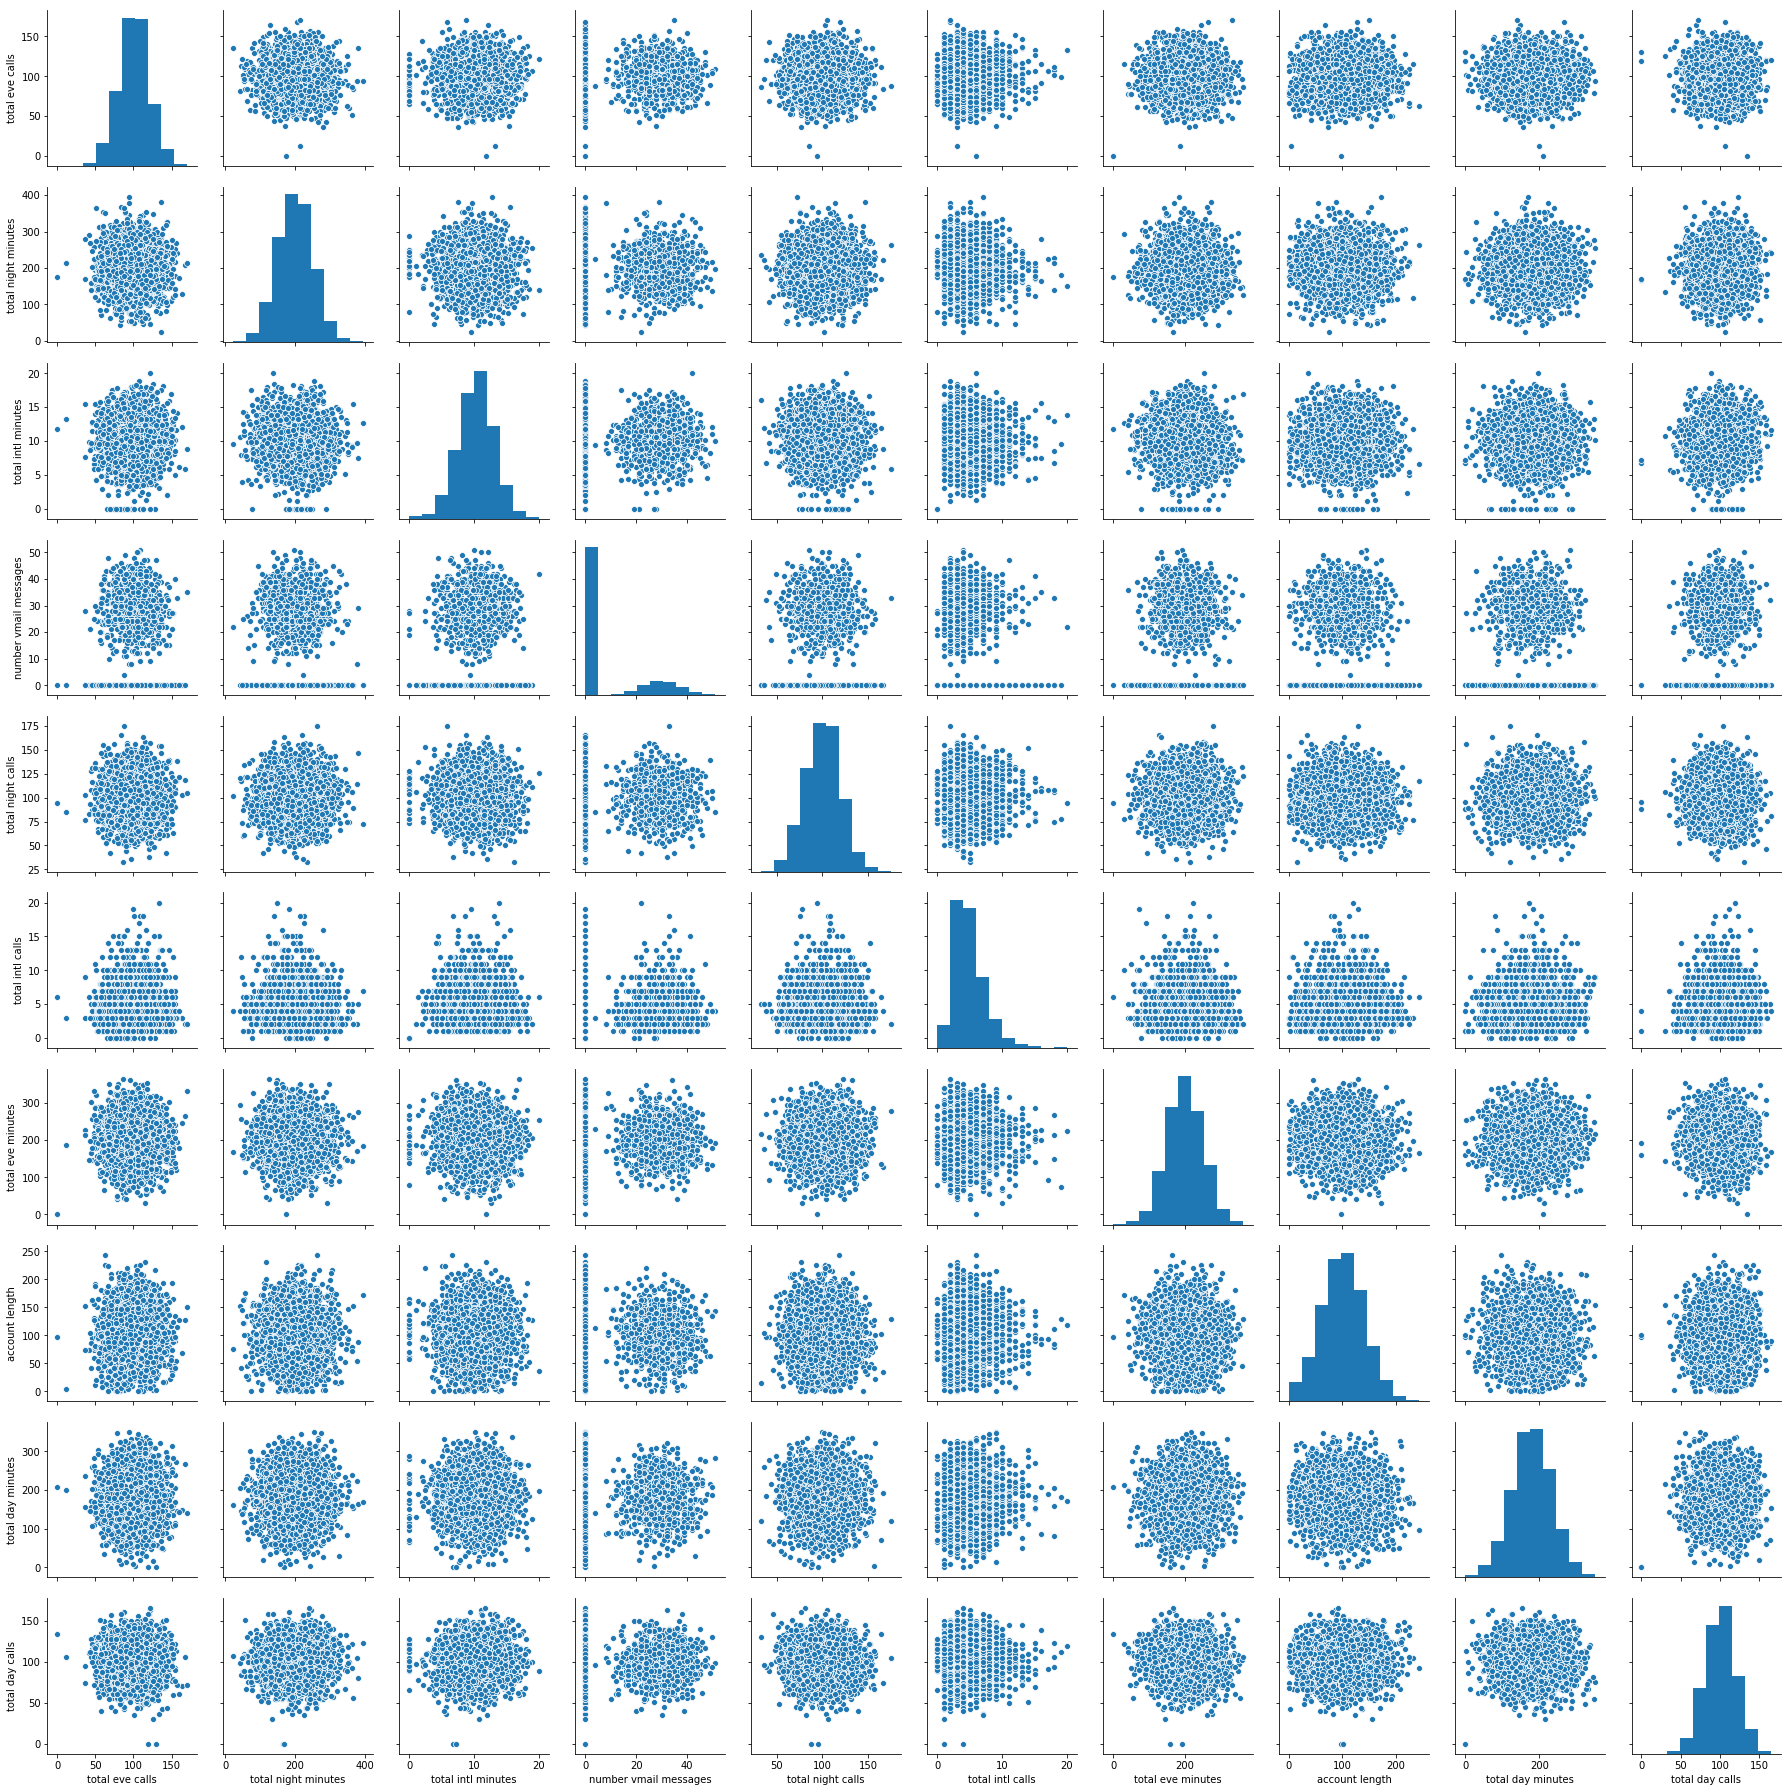

In [23]:
# %config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

In [24]:
%config InlineBackend.figure_format = 'svg'

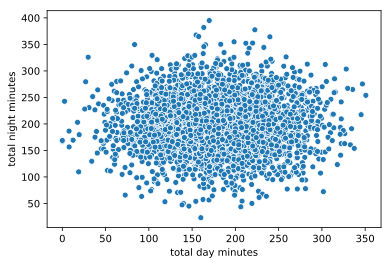

In [25]:
sns.scatterplot('total day minutes','total night minutes',data=df)

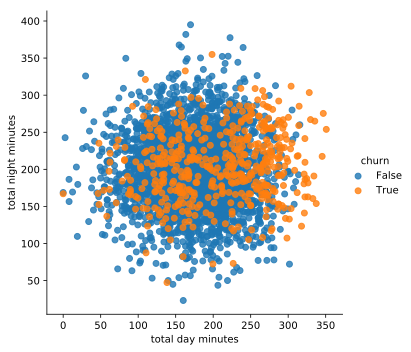

In [26]:
sns.lmplot('total day minutes','total night minutes',data=df,hue='churn',fit_reg = False)

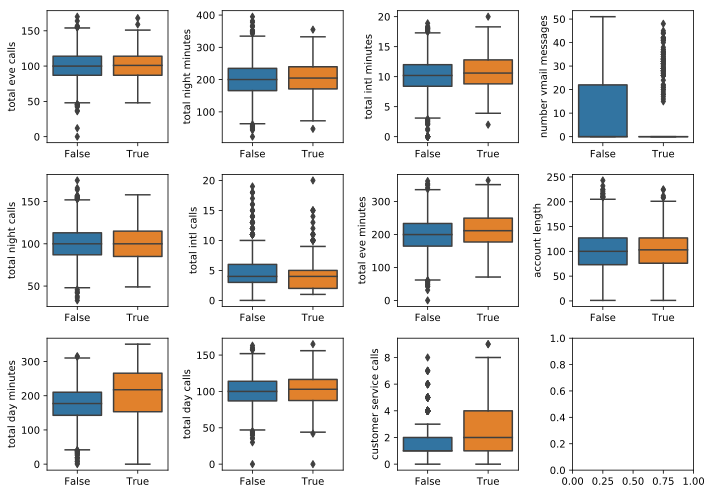

In [27]:
numerical = list(set(numerical) - set(['phone number','voice mail plan','customer service calls']))
numerical.append('customer service calls')

fig,axes = plt.subplots(nrows=3,ncols=4,figsize=(10,7))
for idx,feat in enumerate(numerical):
    ax=axes[int(idx/4),idx % 4]
    sns.boxplot(x='churn',y=feat,data=df,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

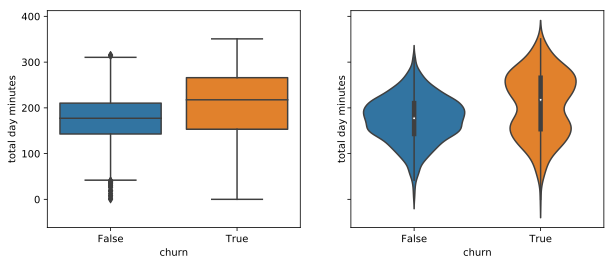

In [28]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(10,4))
sns.boxplot(x='churn',y='total day minutes',data=df,ax=axes[0])
sns.violinplot(x='churn',y='total day minutes',data=df,ax=axes[1])

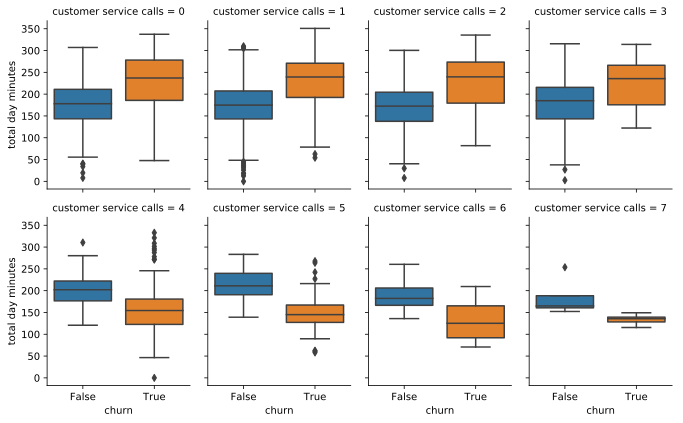

In [29]:
sns.catplot(x='churn',y='total day minutes',col='customer service calls',data=df[df['customer service calls']<8],
            kind='box',col_wrap=4,height=3,aspect=.8)

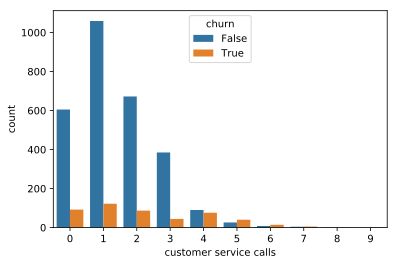

In [30]:
sns.countplot(x='customer service calls',hue='churn',data=df)

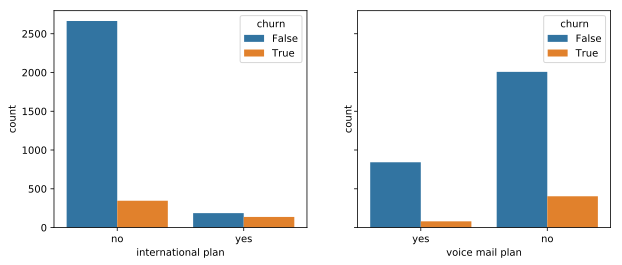

In [31]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(10,4))

sns.countplot(x='international plan',hue='churn',data=df,ax=axes[0])
sns.countplot(x='voice mail plan',hue='churn',data=df,ax=axes[1])

In [32]:
pd.crosstab(df['state'],df['churn']).T

state  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

state  WI  WV  WY  
churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [33]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [34]:
X=df.drop(['churn','state'],axis=1)

In [35]:
X['international plan'] = X['international plan'].map({'yes':1,'no':0})
X['voice mail plan'] = X['voice mail plan'].map({'yes':1,'no':0})

In [36]:
X = X.drop('phone number',axis=1)

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\tcl\Anaconda\envs\py3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [38]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

Wall time: 33.2 s


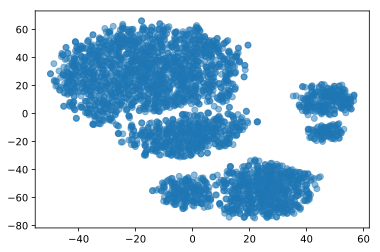

In [39]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1],alpha=0.5)

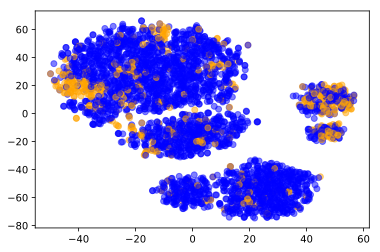

In [40]:
plt.scatter(tsne_repr[:,0],tsne_repr[:,1],c=df['churn'].map({'False':'blue','True':'orange'}),alpha=0.5)

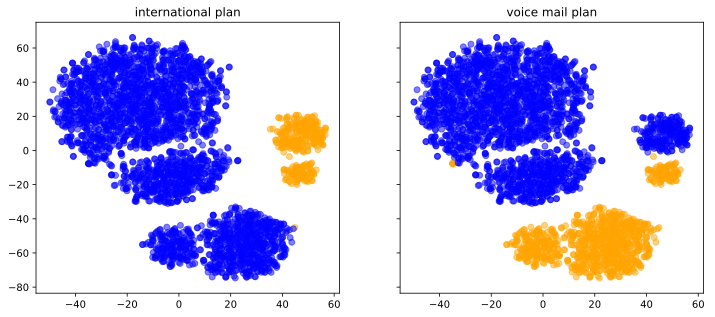

In [41]:
_,axes = plt.subplots(1,2,sharey=True,figsize=(12,5))

for i,name in enumerate(['international plan','voice mail plan']):
    axes[i].scatter(tsne_repr[:,0],tsne_repr[:,1],c=df[name].map({'yes':'orange','no':'blue'}),alpha=0.5)
    axes[i].set_title(name)

In [42]:
plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['image.cmap'] = 'viridis'

In [43]:
df = pd.read_csv('data2.csv')

In [44]:
df.shape

(16719, 16)

In [45]:
df = df.dropna()

In [46]:
df.shape

(6825, 16)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [48]:
df.head(1).T

0
Name             Wii Sports
Platform                Wii
Year_of_Release        2006
Genre                Sports
Publisher          Nintendo
NA_Sales              41.36
EU_Sales              28.96
JP_Sales               3.77
Other_Sales            8.45
Global_Sales          82.53
Critic_Score             76
Critic_Count             51
User_Score                8
User_Count              322
Developer          Nintendo
Rating                    E

In [49]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

In [50]:
useful_cols = ['Name','Platform','Year_of_Release','Genre','Global_Sales','Critic_Score','Critic_Count',
              'User_Score','User_Count','Rating']
df[useful_cols].head()

Name Platform  Year_of_Release     Genre  Global_Sales  \
0             Wii Sports      Wii             2006    Sports         82.53   
2         Mario Kart Wii      Wii             2008    Racing         35.52   
3      Wii Sports Resort      Wii             2009    Sports         32.77   
6  New Super Mario Bros.       DS             2006  Platform         29.80   
7               Wii Play      Wii             2006      Misc         28.92   

   Critic_Score  Critic_Count  User_Score  User_Count Rating  
0          76.0            51         8.0         322      E  
2          82.0            73         8.3         709      E  
3          80.0            73         8.0         192      E  
6          89.0            65         8.5         431      E  
7          58.0            41         6.6         129      E

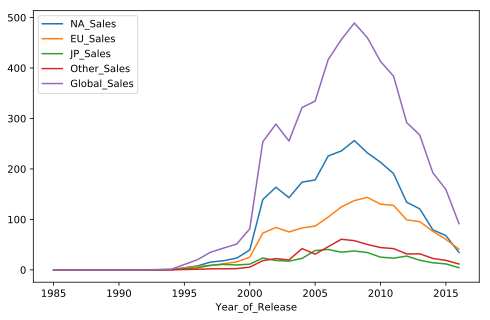

In [51]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot()

In [52]:
[x for x in df.columns if 'Sales' in x]

['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

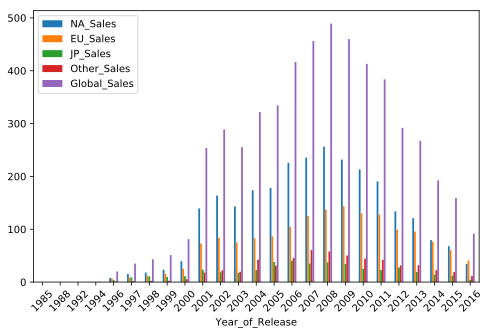

In [53]:
df[[x for x in df.columns if 'Sales' in x] + ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar',rot=45)

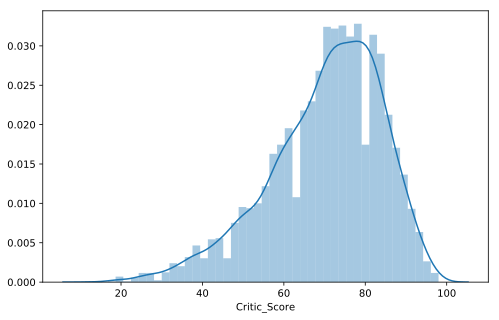

In [56]:
sns.distplot(df['Critic_Score'])

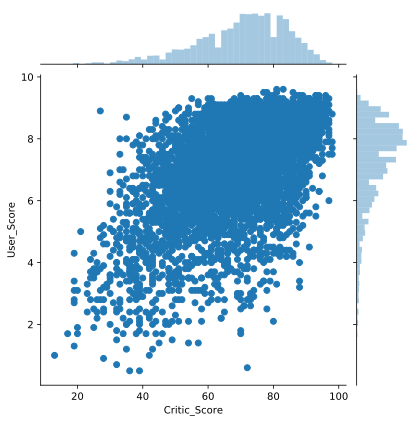

In [57]:
sns.jointplot(x='Critic_Score',y='User_Score',data=df,kind='scatter')

In [59]:
top_platforms = df['Platform'].value_counts().sort_values(ascending=False).head(5).index.values

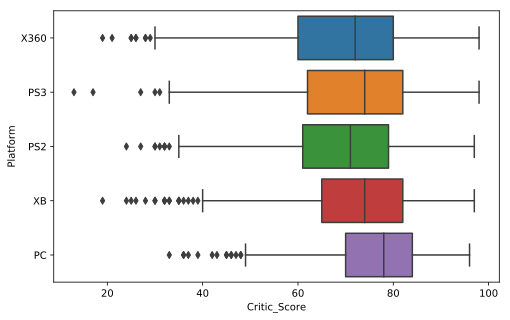

In [60]:
sns.boxplot(y='Platform',x='Critic_Score',data=df[df['Platform'].isin(top_platforms)],orient='h')

In [61]:
platform_genre_sales = df.pivot_table(index='Platform',columns='Genre',values='Global_Sales',aggfunc=sum).fillna(0).applymap(float)

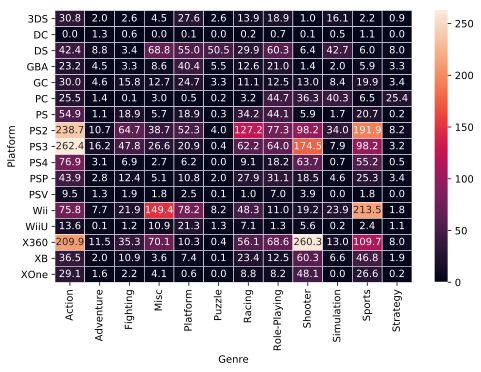

In [66]:
sns.heatmap(platform_genre_sales,annot=True,fmt='.1f',linewidths=0.5)